# LangGraph
**LangGraph's core components:**

**1. Nodes**  
- **Definition**: Nodes represent individual units of computation or tasks within the workflow.  
- **Functionality**:  
  - Each node performs a specific operation (e.g., data processing, model inference, API calls).  
  - Nodes can be stateless (independent) or stateful (dependent on previous states).  
- **Example**:  
  - A node could preprocess EEG data, extract features, or invoke a deep learning model for classification.  

---
**2. Edges**  
- **Definition**: Edges define the flow of data or control between nodes.  
- **Functionality**:  
  - Directed edges specify the sequence of operations (e.g., Node A → Node B).  
  - Conditional edges enable dynamic routing based on intermediate results (e.g., if condition X, go to Node C; else, Node D).  
- **Example**:  
  - After preprocessing EEG data, an edge routes the output to a feature extraction node.  

---

**3. States**  
- **Definition**: States represent the shared data or context that flows through the graph.  
- **Functionality**:  
  - States store intermediate results, metadata, or configuration parameters.  
  - Nodes read from and write to the state, enabling seamless data exchange.  
- **Example**:  
  - A state could store raw EEG data, extracted features, and model predictions, which are updated as the workflow progresses.  

---

## What is LangGraph?
LangGraph is an open-source framework designed to simplify the development of AI agents. Unlike traditional programming frameworks, where control flows linearly from one task to the next, LangGraph structures **workflows as graphs**. In a LangGraph **workflow, tasks** are represented as nodes and the connections between them as edges. This graph-based approach makes LangGraph particularly well-suited for AI agents that need to manage complex, dynamic decision-making and data processing tasks.

## Why a Graph-Based Approach?
LangGraph is inspired by **Pregel** (a large-scale graph processing framework developed by Google) and **Apache Beam** (open source batch and realtime processing framework). The public interface draws inspiration from **NetworkX**. LangGraph is built by LangChain Inc, the creators of LangChain, but can be used without LangChain or in combination for best results.

To understand why LangGraph uses a graph-based approach, let’s take a quick look at what graphs are and how they work. In computer science, a graph is a collection of **nodes (or vertices)** and **edges (or links)** that connect these nodes.
Graphs allow for multiple paths and connections, making them ideal for workflows that involve **branching**, **looping**, or **concurrent tasks**.

In LangGraph:
- **Nodes** represent **individual tasks** or **actions**. Each node can perform a specific function, like processing data or making a decision.
- **Edges** define the relationships between nodes and control the flow of data. They can be configured with **conditions**, allowing the workflow to follow different paths based on specific criteria.
 
This flexibility enables you to create workflows that are not strictly linear, but instead can branch out and adapt to different scenarios.

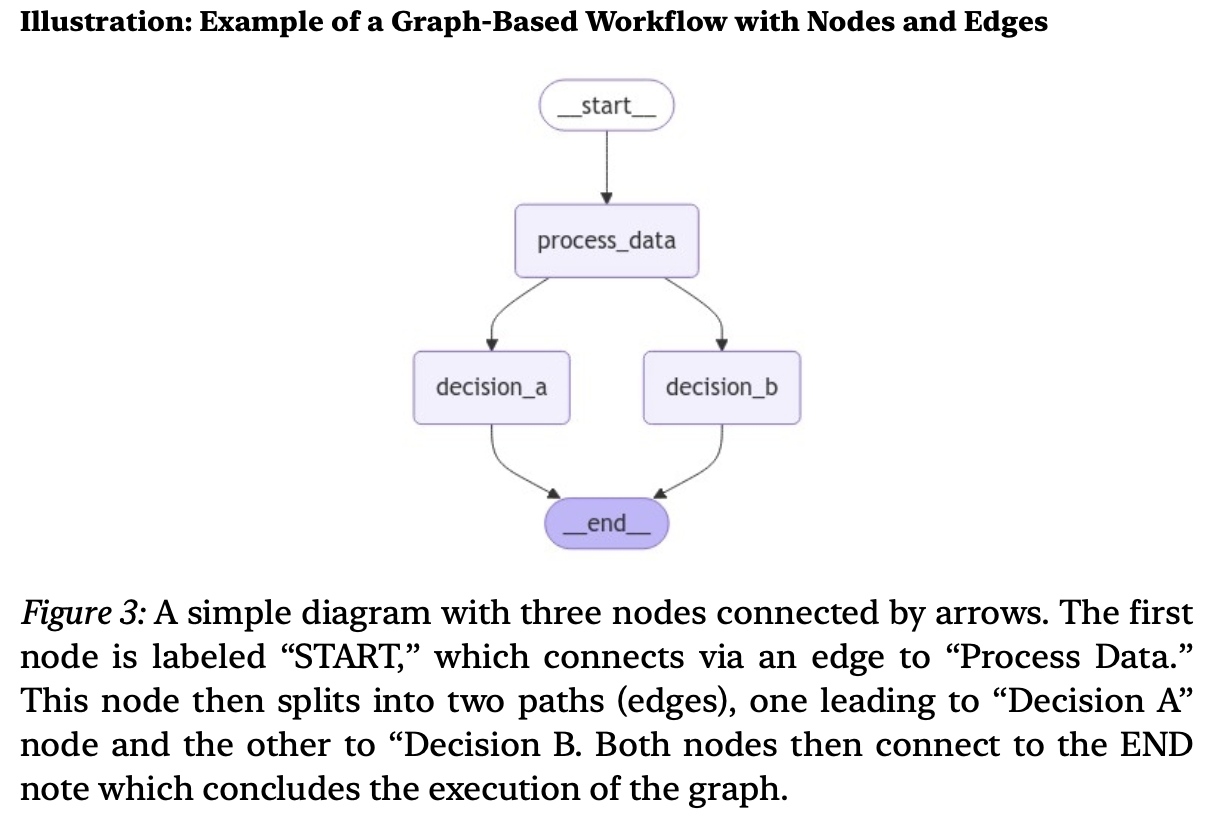

## Core Principles of LangGraph 
LangGraph is built on several core principles that make it ideal for developing reliable and dynamic agents:

- **Controllability:** Define the flow of your application precisely using **nodes (tasks)** and **edges (connections)**. This allows for both **deterministic** and **conditional workflows**.
- **Persistence:** Maintain the state of your application across different sessions or interactions using various storage options like databases.
- **Human-in-the-Loop:** Incorporate human oversight or intervention within the workflow, enhancing reliability and decision-making.
- **Streaming:** Provide real-time updates and allow for continuous interaction between the agent and users or other systems. 

## How AI Agents Benefit from LangGraph’s Structure
AI agents often need to handle tasks like:
- **Decision-Making:** Evaluating conditions and choosing between multiple actions.
- **Data Processing:** Analyzing input data and transforming it into useful information.
- **Interaction with External Systems:** Fetching data from APIs, logging information, or performing other I/O operations. 
In LangGraph, each of these tasks can be broken down into individual nodes, connected by edges that dictate the flow of information. For example, imagine building a chatbot for customer service. This bot might need to:
- **Understand User Queries:** Identify the type of question or request a user has submitted.
- **Route the Query:** Determine whether the query can be handled automatically or if it needs escalation to a human agent.
- **Log the Interaction:** Record the conversation for future reference or analysis.

Each of these tasks can be represented by a separate node in LangGraph, which can be easily updated or modified without affecting other parts of the workflow. This modularity makes it simple to expand the bot’s capabilities over time. Need to add a feature that recommends products to customers based on their questions? Just add a new node, connect it to the existing workflow, and you’re good to go!

# First AI Agent: "Hello World"

In [4]:
!poetry add langgraph requests 

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
The following packages are already present in the pyproject.toml and will be skipped:

  - langgraph
  - requests

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.


## 1. Define State

- **State:** Holds our greeting message.

> Every node has access to the **state**.

In [70]:
from typing_extensions import TypedDict

In [72]:
from typing_extensions import TypedDict

# Define the state's structure
class HelloWorldState(TypedDict):
    # This key will store the greeting message
    greeting:str

## 2. Create a Hello World function (node)

In [75]:
# Task Function (Node)
def hello_node(state:HelloWorldState):
    state["greeting"] = "Hello " + state["greeting"]
    return state

In [76]:
# Task Function (Node)
def welcome_node(state:HelloWorldState):
    state["greeting"] = state["greeting"] + "Welcome! Welcome!"
    return state

## 3. Setup the Graph Structure (LangGraph Workflow)
Need to create a Graph that connect the Nodes with the Edges and establish a pipeline from START to FINISH.

In [78]:
from langgraph.graph import StateGraph, START, END

# Initialize the Graph with the State
builder = StateGraph(HelloWorldState)

# Add Node
builder.add_node("greet",hello_node)
builder.add_node("welcome",welcome_node)

# Define the Workflow (flow of execution) using Edges
builder.add_edge(START, "greet") # Connect START to the "greet" node
builder.add_edge("greet", "welcome")
builder.add_edge("welcome", END) # Connect "greet" node to the End

## 4. Compile and run the Graph
Run the workflow by invoking the Graph with an inital state which will trigger the Node to process the data and output the result.

In [80]:
graph = builder.compile()
result = graph.invoke({
    "greeting": "Subrata Mondal. "
})

print(result)

{'greeting': 'Hello Subrata Mondal. Welcome! Welcome!'}


## 5. Visualzize the Graph

In [87]:
def save_png(graph, output_folder="./graphs", xray=1, draw_method=MermaidDrawMethod.API, filename=None):
    """Save Mermaid graph as PNG file."""
    import os
    import random
    from langchain_core.runnables.graph import MermaidDrawMethod
    
    mermaid_png = graph.get_graph(xray=xray).draw_mermaid_png(draw_method=draw_method)
    
    os.makedirs(output_folder, exist_ok=True)
    
    if not filename:
        filename = f"graph_{random.randint(1, 1000000)}.png"
    full_path = os.path.join(output_folder, filename)
    
    with open(full_path, "wb") as f:
        f.write(mermaid_png)
    
    return full_path

In [82]:
save_png(graph, output_folder=".", xray=1, draw_method=MermaidDrawMethod.API, filename=None)

'./graph_938169.png'

In [83]:
def open_png(filename):
    """Open PNG file using default system viewer."""
    import sys
    import subprocess
    
    if sys.platform.startswith("darwin"):
        subprocess.call(['open', filename])
    elif sys.platform.startswith("win32"):
        subprocess.call(['start', filename], shell=True)
    else:
        subprocess.call(['xdg-open', filename])

In [68]:
open_png(filename)

In [84]:
def open_png_in_jupyter(filename):
    from IPython.display import Image, display
    """Display PNG image in Jupyter Notebook."""
    display(Image(filename=filename))

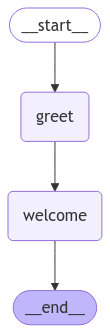

In [86]:
open_png_in_jupyter(filename="./graphs/graph_938169.png")

---